In [1]:
column_explain = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/K-드라마 프로그램 출연진정보 채_컬럼정의서.xlsx'
data0_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202109.csv'
data1_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202110.csv'
data2_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202111.csv'
test_url = '/content/drive/MyDrive/Colab Notebooks/Section2_Project/TNM/TN_K_DRAMA_CST_AUDERT_INFO_202112.csv'

In [ ]:
# xlsx 파일을 불러오기위해서 xlrd를 최신 버전으로 업그레이드 해준다. #다른 것들도 다 install 
! pip install --upgrade xlrd
! pip install shap
! pip install pdpbox
! pip install eli5
! pip install category_encoders

In [3]:
import pandas as pd
import openpyxl
import xlrd

column_explain = pd.read_excel(column_explain)

In [4]:
column_explain

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,BRDCST_DE,방송일자,VARCHAR,8,Y,Y
1,2,BRDCST_END_DE,방송종료일자,VARCHAR,8,Y,Y
2,3,CHNNEL_NM,채널명,VARCHAR,200,Y,Y
3,4,PROGRM_BEGIN_TIME,프로그램시작시간,VARCHAR,6,Y,Y
4,5,PROGRM_END_TIME,프로그램종료시간,VARCHAR,6,N,Y
5,6,PROGRM_NM,프로그램명,VARCHAR,200,N,Y
6,7,PROGRM_DC,프로그램설명,VARCHAR,500,N,N
7,8,BRDCST_TME_NM,방송회차명,VARCHAR,200,N,N
8,9,PROGRM_BRDCST_AREA_NM,프로그램방송지역명,VARCHAR,200,N,Y
9,10,BRDCST_TIME,방송시간,VARCHAR,6,N,Y


In [5]:
df0 = pd.read_csv(data0_url)
df0.info(), df0.head()
## 전체 4509

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4509 non-null   int64  
 1   BRDCST_END_DE                4509 non-null   int64  
 2   CHNNEL_NM                    4509 non-null   object 
 3   PROGRM_BEGIN_TIME            4509 non-null   int64  
 4   PROGRM_END_TIME              4509 non-null   int64  
 5   PROGRM_NM                    4509 non-null   object 
 6   PROGRM_DC                    33 non-null     object 
 7   BRDCST_TME_NM                4487 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4509 non-null   object 
 9   BRDCST_TIME                  4509 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4509 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4509 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4509 non-null   object 
 13  MALE_4_9YO_WTCHNG_

(None,
    BRDCST_DE  BRDCST_END_DE CHNNEL_NM  PROGRM_BEGIN_TIME  PROGRM_END_TIME  \
 0   20210901       20210901      KBS1             203112           205919   
 1   20210901       20210901      KBS2              92259            95100   
 2   20210901       20210901      KBS2             195053           202630   
 3   20210901       20210901       MBC              85223            92144   
 4   20210901       20210901       MBC             190240           193206   
 
   PROGRM_NM PROGRM_DC BRDCST_TME_NM PROGRM_BRDCST_AREA_NM  BRDCST_TIME  ...  \
 0     속아도꿈결       NaN           98회                    전국         2807  ...   
 1     속아도꿈결       NaN           97회                    전국         2801  ...   
 2      빨강구두       NaN           32회                    전국         3537  ...   
 3     두번째남편       NaN           16회                    전국         2921  ...   
 4     두번째남편       NaN           17회                    전국         2926  ...   
 
   MALE_N50S_WTCHNG_RT MALE_N60S_ABOVE_WT

In [6]:
df1 = pd.read_csv(data1_url)
df1.info(), df1.head()
## 전체 4819
df1['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4819 non-null   int64  
 1   BRDCST_END_DE                4819 non-null   int64  
 2   CHNNEL_NM                    4819 non-null   object 
 3   PROGRM_BEGIN_TIME            4819 non-null   int64  
 4   PROGRM_END_TIME              4819 non-null   int64  
 5   PROGRM_NM                    4819 non-null   object 
 6   PROGRM_DC                    89 non-null     object 
 7   BRDCST_TME_NM                4799 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4819 non-null   object 
 9   BRDCST_TIME                  4819 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4819 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4819 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4819 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211001, 20211002, 20211003, 20211004, 20211005, 20211006,
       20211007, 20211008, 20211009, 20211010, 20211011, 20211012,
       20211013, 20211014, 20211015, 20211016, 20211017, 20211018,
       20211019, 20211020, 20211021, 20211022, 20211023, 20211024,
       20211025, 20211026, 20211027, 20211028, 20211029, 20211030,
       20211031, 20211101])

In [7]:
df2 = pd.read_csv(data2_url)
df2.info(), df2.head()
## 전체 4711
df2['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    4711 non-null   int64  
 1   BRDCST_END_DE                4711 non-null   int64  
 2   CHNNEL_NM                    4711 non-null   object 
 3   PROGRM_BEGIN_TIME            4711 non-null   int64  
 4   PROGRM_END_TIME              4711 non-null   int64  
 5   PROGRM_NM                    4711 non-null   object 
 6   PROGRM_DC                    46 non-null     object 
 7   BRDCST_TME_NM                4680 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        4711 non-null   object 
 9   BRDCST_TIME                  4711 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        4711 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        4711 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        4711 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211101, 20211102, 20211103, 20211104, 20211105, 20211106,
       20211107, 20211108, 20211109, 20211110, 20211111, 20211112,
       20211113, 20211114, 20211115, 20211116, 20211117, 20211118,
       20211119, 20211120, 20211121, 20211122, 20211123, 20211124,
       20211125, 20211126, 20211127, 20211128, 20211129, 20211130,
       20211201])

In [8]:
test = pd.read_csv(test_url)
test.info(), test.head()
## 전체 5315
test['BRDCST_DE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    5315 non-null   int64  
 1   BRDCST_END_DE                5315 non-null   int64  
 2   CHNNEL_NM                    5315 non-null   object 
 3   PROGRM_BEGIN_TIME            5315 non-null   int64  
 4   PROGRM_END_TIME              5315 non-null   int64  
 5   PROGRM_NM                    5315 non-null   object 
 6   PROGRM_DC                    71 non-null     object 
 7   BRDCST_TME_NM                5298 non-null   object 
 8   PROGRM_BRDCST_AREA_NM        5315 non-null   object 
 9   BRDCST_TIME                  5315 non-null   int64  
 10  PROGRM_GENRE_LCLAS_NM        5315 non-null   object 
 11  PROGRM_GENRE_MLSFC_NM        5315 non-null   object 
 12  PROGRM_GENRE_SCLAS_NM        5315 non-null   object 
 13  MALE_4_9YO_WTCHNG_

array([20211201, 20211202, 20211203, 20211204, 20211205, 20211206,
       20211207, 20211208, 20211209, 20211210, 20211211, 20211212,
       20211213, 20211214, 20211215, 20211216, 20211217, 20211218,
       20211219, 20211220, 20211221, 20211222, 20211223, 20211224,
       20211225, 20211226, 20211227, 20211228, 20211229, 20211230,
       20211231, 20220101])

In [9]:
# df0, df1, df2 모두 9, 10, 11월 값. test는 12월 값
# concat으로 합친 후, 중복 값 확인. 
df = pd.concat([df0, df1, df2], ignore_index = True)
df_ori = pd.concat([df0, df1, df2], ignore_index = True)

In [10]:
print(len(df) == len(df1) + len(df2) + len(df0)) #정상적으로 합쳐짐.
df.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14039 entries, 0 to 14038
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BRDCST_DE                    14039 non-null  int64  
 1   BRDCST_END_DE                14039 non-null  int64  
 2   CHNNEL_NM                    14039 non-null  object 
 3   PROGRM_BEGIN_TIME            14039 non-null  int64  
 4   PROGRM_END_TIME              14039 non-null  int64  
 5   PROGRM_NM                    14039 non-null  object 
 6   PROGRM_DC                    168 non-null    object 
 7   BRDCST_TME_NM                13966 non-null  object 
 8   PROGRM_BRDCST_AREA_NM        14039 non-null  object 
 9   BRDCST_TIME                  14039 non-null  int64  
 10  PROGRM_GENRE_LCLAS_NM        14039 non-null  object 
 11  PROGRM_GENRE_MLSFC_NM        14039 non-null  object 
 12  PROGRM_GENRE_SCLAS_NM        14039 non-null  object 
 13  MALE_4_9YO_

In [11]:
df.duplicated().sum() #중복 없음.

0

In [12]:
## 특성을 엔지니어링 하는 함수 생성 ## 

def engineer(df):

  # begin time conver to 'A','B','C', etc. def
  def convert_time(x):
    if (x >= 000000) & (x <= 25959):
      return "A"
    if x >= 30000 and x <= 55959:
      return "B"
    if x >= 60000 and x <= 85959:
      return "C"
    if x >= 90000 and x <= 115959:
      return "D"
    if x >= 120000 and x <= 145959:
      return "E"
    if x >= 150000 and x <= 175959:
      return "F"
    if x >= 180000 and x <= 205959:
      return "G"
    if x >= 210000 and x <= 235959:
      return "H"
  df['PROGRM_BEGIN_TIME'] = df['PROGRM_BEGIN_TIME'].apply(convert_time)

  ## 컬럼명 변경
  df.rename(columns = {'BRDCST_DE' : 'date',
                     'CHNNEL_NM' : 'chanel',
                     'PROGRM_BEGIN_TIME' : 'time',
                     'PROGRM_NM' : 'name',
                     'PROGRM_GENRE_SCLAS_NM' : 'genre',
                     'MALE_N20S_WTCHNG_RT' : 'm_20',
                     'MALE_N30S_WTCHNG_RT' : 'm_30',
                     'FEMALE_N20S_WTCHNG_RT' : 'f_20',
                     'FEMALE_N30S_WTCHNG_RT' : 'f_30',
                     'CST_CN' : 'casting'}, inplace = True)
  ###컬럼삭제
  delete_columns = ['BRDCST_END_DE','PROGRM_DC', 'BRDCST_TME_NM', 
                  'PROGRM_BRDCST_AREA_NM','PROGRM_GENRE_LCLAS_NM', 
                  'PROGRM_GENRE_MLSFC_NM', 'PROGRM_END_TIME', 
                  'BRDCST_TIME', 'MALE_4_9YO_WTCHNG_RT',
                  'MALE_N10S_WTCHNG_RT', 'MALE_N40S_WTCHNG_RT',
                  'MALE_N50S_WTCHNG_RT','MALE_N60S_ABOVE_WTCHNG_RT',
                  'FEMALE_4_9YO_WTCHNG_RT','FEMALE_N10S_WTCHNG_RT',
                  'FEMALE_N40S_WTCHNG_RT','FEMALE_N50S_WTCHNG_RT',
                  'FEMALE_N60S_ABOVE_WTCHNG_RT', 'date']
  df.drop(columns = delete_columns, axis = 1, inplace=True)

  return df

In [13]:
train = engineer(df)
test = engineer(test)

In [18]:
train.head()

,chanel,time,name,genre,m_20,m_30,f_20,f_30,casting
12124,TRENDY,G,부부클리닉사랑과전쟁2,단막극,0.00000,0.00838,0.00000,0.00000,"이재만,민지영,최영완,이정수,장가현,손유경,이준우"
4351,MBC,C,두번째남편,일일연속극,0.25389,0.83864,0.63164,0.75839,"봉선화역:엄현경,윤재민역:차서원,윤재경역:오승아,문상혁역:한기웅,주해란역:지수원,윤..."
9293,SKY,C,홍천기,미니시리즈,0.07504,0.00753,0.26470,0.12051,"저자정은궐,출판파란(파란미디어)2021.08.20.,리뷰9건,도서27,000원판매처..."
5490,KBS Story,A,빨강구두,일일연속극,0.00000,0.07578,0.00000,0.00000,"민희경역:최명길,김진아역:소이현,윤기석역:박윤재,윤현석역:신정윤,권혜빈역:정유민,권..."
5873,CNTV,H,대조영,주말연속극,0.00000,0.00000,0.01624,0.02051,"대조영역:최수종,이해고역:정보석,설인귀역:이덕화,검이역:정태우,초린역:박예진,숙영역..."


In [15]:
train.shape, test.shape

((14039, 9), (5315, 9))

In [17]:
from sklearn.model_selection import train_test_split
target = 'm_30'
train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 2)

In [19]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [20]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11231, 8), (2808, 8), (11231,), (2808,))

In [21]:
print(len(df.shape) == len(train.shape))

True


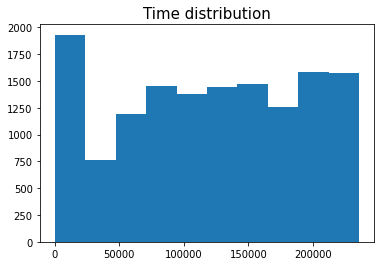

In [22]:
### 기존 숫자형태로 되어있던 시간 분포 
import matplotlib.pyplot as plt
colors = ['#E76939', '#9B2B5A', '#E50E45', '#6D045E','#022A76', '#191232',
          '#F4B951', '#055156', '#A6D26A', '#13BC81','#252848', '#076F50']
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.hist(df_ori['PROGRM_BEGIN_TIME'])
plt.show()

In [23]:
y_axis = X_train['time'].value_counts()
y_axis
x_axis = ['A', 'B', 'C', 'D','E','F','G','H']

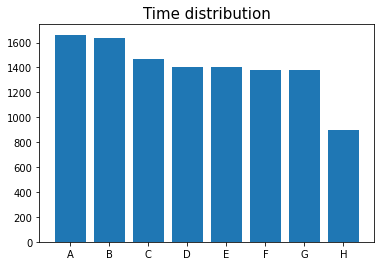

In [24]:
### 새롭게 A,B,C,,, H 24시간을 8개의 시간대로 구분한 시간대 
plt.figure(figsize=(6,4))
plt.title('Time distribution', size = 15)
plt.bar(x_axis, y_axis)
plt.show()

In [ ]:
y_train.sort_values(ascending=False).describe()

In [ ]:
import seaborn as sns
from scipy import stats
sns.distplot(np.log1p(y_train))

In [ ]:
sns.distplot((y_train))

In [ ]:
yy_train = df[df['m_30'] < np.percentile(df['m_30'], 99.5)]['m_30']
yy_train.describe()
df.shape

In [ ]:
yy_train = (y_train < np.percentile(y_train, 99.5))
yy_train = (yy_train > np.percentile(y_train, 99.5))

In [ ]:
yy_train

In [ ]:
sns.distplot(np.log1p(yy_train))

In [ ]:
y_train.isnull().sum()
y_train

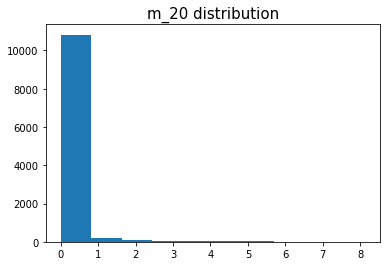

In [25]:
import numpy as np 
plt.figure(figsize=(6,4))
plt.title('m_20 distribution', size = 15)
plt.hist(y_train)
plt.show()

Baseline 설정 및 검증

In [26]:
baseline = y_train.mean()
baseline

0.1537021556406375

In [29]:
# 기준모델로 훈련 R2, MSE 계산
from sklearn.metrics import r2_score, mean_squared_error
y_pred = [baseline] * len(y_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'훈련 세트 r2: {r2:.10f}')
print(f'훈련 세트 MSE: {mse:.10f}')

r2 score: 0.0000000000
MSE훈련 에러: 0.2696117100


In [33]:
# 기준모델로 검증 에러 계산
y_pred = [baseline] * len(y_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f'검증 세트 r2: {r2:.10f}')
print(f'검증 세트 MSE: {mse:.10f}')
# it can be negative (because the model can be arbitarily worse)
# 음수가 될 수도 있다. 모델이 악화될 수도 있기 때문. (즉 모델이 garbage....)

r2 score: -0.0002229936
MSE훈련 에러: 0.3085190294


In [34]:
# 테스트 에러(MAE)
y_pred = [baseline] * len(y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print(f'테스트 세트 r2: {r2:.10f}')
print(f'테스트 세트 MSE: {mse:.10f}')

r2 score: -0.0000344486
MSE훈련 에러: 0.3085190294


1.랜덤포레스트

In [ ]:
## LinearRegression
from sklearn.preprocessing import MinMaxScaler #MinMax로 정규화
from sklearn.ensemble import RandomForestRegressor #RandomForest회귀분석
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import f1_score, roc_auc_score
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")

# 컬럼 정규화 
scaled_columns = ['m_20', 'f_20', 'f_30']
scaler = MinMaxScaler().fit(X_train[scaled_columns])

pipeline = make_pipeline(
    TargetEncoder(cols = ['chanel', 'time', 'name', 'genre', 'casting']),
    RandomForestRegressor(n_jobs=-1)
    )

dists = { 
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, 25, None],
    'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'randomforestregressor__min_samples_split': [2, 3, 4, 5, 6, 7],
    }

clf = RandomizedSearchCV(
    pipeline,
    param_distributions= dists, 
    n_iter=8, 
    cv=5, 
    scoring='neg_mean_squared_error',  
    verbose=1,
    refit=True,
    n_jobs=-2
    )

clf.fit(X_train, y_train)

In [ ]:
## train  - 랜덤포레스트 최적화된 하이퍼파라미터로 오류 확인
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
pipe = clf.best_estimator_
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)

print(f'훈련 세트 r2: {r2:.10f}')
print(f'훈련 세트 조정된 r2: {adj_r2(r2, X_train.shape[0], X_train.shape[1]):.10f}')
print(f'훈련 세트 MSE: {mse:,.10f}')

In [41]:
## val - 랜덤포레스트 최적화된 하이퍼파라미터로 오류 확인
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
pipe = clf.best_estimator_
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'검증 세트 r2: {r2:.10f}')
print(f'검증 세트 조정된 r2: {adj_r2(r2, X_val.shape[0], X_val.shape[1]):.10f}')
print(f'검증 세트 MSE: {mse:,.10f}')

검증세트 r2: 0.9131727485
검증세트 조정된 r2: 0.9129245820
검증세트 MSE: 0.0267818872


In [42]:
### Test - 랜덤포레스트 최적화된 하이퍼파라미터 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
pipe = clf.best_estimator_
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'테스트 세트 r2: {r2:.10f}')
print(f'테스트 세트 조정된 r2: {adj_r2(r2, X_test.shape[0], X_test.shape[1]):.10f}')
print(f'테스트 세트 MSE: {mse:,.10f}')

검증세트 r2: 0.8717291803
검증세트 조정된 r2: 0.8715357829
검증세트 MSE: 0.0298898547


2. 다중선형회귀

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
X_train = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train
# TargetEncoder().fit(X_train)
lr.fit(X_train, y_train)

LinearRegression()

검증세트 r2: 0.9047536529
검증세트 조정된 r2: 0.9009889403
검증세트 MSE: 0.0256795305
------------------------------------------------------------


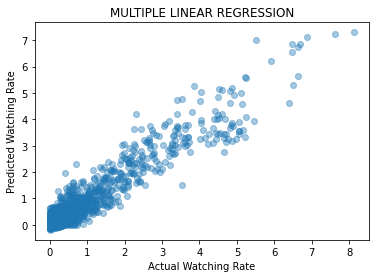

In [63]:
## Train - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
y_pred = lr.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
print(f'훈련 세트 r2: {r2:.10f}')
print(f'훈련 세트 조정된 r2: {adj_r2(r2, X_train.shape[0], X_train.shape[1]):.10f}')
print(f'훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

검증세트 r2: -930491171491843145728.0000000000
검증세트 조정된 r2: -1097432234612438597632.0000000000
검증세트 MSE: 287,010,231,636,267,925,504.0000000000
------------------------------------------------------------


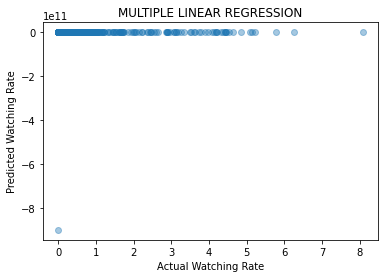

In [70]:
## Val - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_val[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
# X_train = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train

X_val = encoder.fit_transform(X_val)
y_pred = lr.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'검증 세트 r2: {r2:.10f}')
print(f'검증 세트 조정된 r2: {adj_r2(r2, X_val.shape[0], X_val.shape[1]):.10f}')
print(f'검증 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [111]:
## Test - 다중선형회귀 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_test[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 

X_test = encoder.transform(X_test)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'테스트 세트 r2: {r2:.10f}')
print(f'테스트 세트 조정된 r2: {adj_r2(r2, X_test.shape[0], X_test.shape[1]):.10f}')
print(f'테스트 세트 MSE: {mse:,.10f}')

print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

TypeError: ignored

3. XGboost 

In [75]:
from xgboost import XGBRegressor

scaled_columns = ['m_20', 'f_20', 'f_30']

MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
X_train_encoded = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train
X_val_encoded = encoder.fit_transform(X_val)

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
    )

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:0.512216	validation_1-rmse:0.533563
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.424223	validation_1-rmse:0.442921
[2]	validation_0-rmse:0.355672	validation_1-rmse:0.371542
[3]	validation_0-rmse:0.302257	validation_1-rmse:0.313957
[4]	validation_0-rmse:0.261043	validation_1-rmse:0.271589
[5]	validation_0-rmse:0.2291	validation_1-rmse:0.239282
[6]	validation_0-rmse:0.20554	validation_1-rmse:0.21858
[7]	validation_0-rmse:0.187725	validation_1-rmse:0.201623
[8]	validation_0-rmse:0.174748	validation_1-rmse:0.18934
[9]	validation_0-rmse:0.165288	validation_1-rmse:0.181241
[10]	validation_0-rmse:0.158677	validation_1-rmse:0.175671
[11]	validation_0-rmse:0.15361	validation_1-rmse:0.171318
[12]	validation_0-rmse:0.150053	validation_1-rmse:0.169752
[13]	validation_0-rmse:0.147392	validation_1-rmse:0.167927
[14]	validation_0-rmse:0.144951

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

훈련 세트 r2: 0.9471423358
훈련 세트 조정된 r2: 0.9450530807
훈련 세트 MSE: 0.0142510452
------------------------------------------------------------


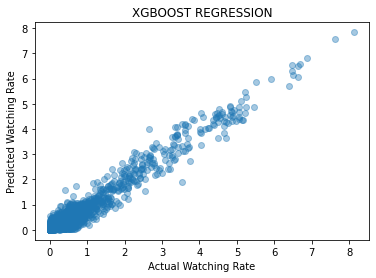

In [85]:
## Train - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)
    
y_pred = boosting.predict(X_train)
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train,y_pred)
print(f'훈련 세트 r2: {r2:.10f}')
print(f'훈련 세트 조정된 r2: {adj_r2(r2, X_train.shape[0], X_train.shape[1]):.10f}')
print(f'훈련 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_train, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBOOST REGRESSION")
plt.show()

In [77]:
y_pred = boosting.predict(X_train_encoded)
print('R^2', r2_score(y_train, y_pred))
print(f'검증세트 r2: {r2:.10f}')
print(f'검증세트 조정된 r2: {adj_r2(r2, X_test.shape[0], X_test.shape[1]):.10f}')
print(f'검증세트 MSE: {mse:,.10f}')

R^2 0.9471423358053582


검증 세트 r2: 0.9140339392
검증 세트 조정된 r2: 0.8986106165
검증 세트 MSE: 0.0265162527
------------------------------------------------------------


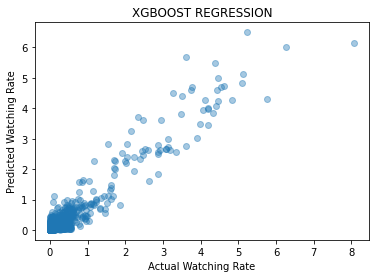

In [87]:
## Val - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

y_pred = boosting.predict(X_val)
r2 = r2_score(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
print(f'검증 세트 r2: {r2:.10f}')
print(f'검증 세트 조정된 r2: {adj_r2(r2, X_val.shape[0], X_val.shape[1]):.10f}')
print(f'검증 세트 MSE: {mse:,.10f}')
print("--" * 30)
plt.scatter(y_val, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBOOST REGRESSION")
plt.show()

In [76]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))

R^2 0.9140339391997713


테스트 세트 r2: 0.8827329193
테스트 세트 조정된 r2: 0.8724867471
테스트 세트 MSE: 0.0273257473
------------------------------------------------------------


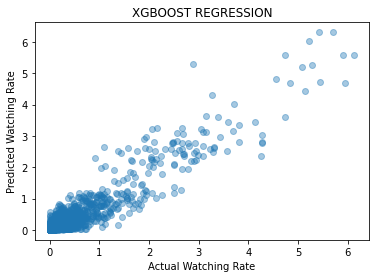

In [86]:
## Test - XGB 모델 오류 확인 
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

scaled_columns = ['m_20', 'f_20', 'f_30']
MinMaxScaler().fit(X_test[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 

X_test_encoded = encoder.fit_transform(X_test)
y_pred = boosting.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'테스트 세트 r2: {r2:.10f}')
print(f'테스트 세트 조정된 r2: {adj_r2(r2, X_test_encoded.shape[0], X_test_encoded.shape[1]):.10f}')
print(f'테스트 세트 MSE: {mse:,.10f}')

print("--" * 30)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Watching Rate")
plt.ylabel("Predicted Watching Rate")
plt.title("XGBOOST REGRESSION")
plt.show()

In [92]:
## XGB 하이퍼 파라미터 튜닝 
xgb_param_grid = {
    'n_estimators': randint(50, 500),
    'max_depth': [4, 5, 6, 7, 8, None],
    'subsample': np.linspace(0.4, 1, 7),
    'lamda': np.linspace(0.4, 1, 7)}

# Create a random search object
xgb_random = RandomizedSearchCV(boosting,
                                param_distributions = xgb_param_grid,
                                n_iter = 10,
                                scoring='neg_mean_squared_error', 
                                n_jobs=-1, 
                                cv = 3, 
                                refit=True, 
                                return_train_score = True)

# Fit to the training data
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(learning_rate=0.2, n_estimators=1000,
                                          n_jobs=-1,
                                          objective='reg:squarederror'),
                   n_jobs=-1,
                   param_distributions={'lamda': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [4, 5, 6, 7, 8, None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4c189abed0>,
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [93]:
xgb_random.best_estimator_ 
#XGBRegressor(lamda=0.8, learning_rate=0.2, max_depth=4, n_estimators=390,
            #  n_jobs=-1, objective='reg:squarederror', subsample=0.8)

XGBRegressor(lamda=0.8, learning_rate=0.2, max_depth=4, n_estimators=390,
             n_jobs=-1, objective='reg:squarederror', subsample=0.8)

In [101]:
# train - XGB 모델 오류 확인 (RandomizedSearchCV)
scaled_columns = ['m_20', 'f_20', 'f_30']

MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩 
X_train_encoded = encoder.fit_transform(X_train) #OHE로 fit and transform - X_train

boost = xgb_random.best_estimator_
y_pred = boost.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)

print(f'훈련 세트 r2: {r2:.10f}')
print(f'훈련 세트 조정된 r2: {adj_r2(r2, X_train_encoded.shape[0], X_train_encoded.shape[1]):.10f}')
print(f'훈련 세트 MSE: {mse:,.10f}')

훈련 세트 r2: 0.9804262964
훈련 세트 조정된 r2: 0.9796526250
훈련 세트 MSE: 0.0265162527


In [107]:
# val - XGB 모델 오류 확인 (RandomizedSearchCV)
scaled_columns = ['m_20', 'f_20', 'f_30']

MinMaxScaler().fit(X_train[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩  
X_val_encoded = encoder.fit_transform(X_val) #OHE로 fit and transform - X_val

boost = xgb_random.best_estimator_
y_pred = boost.predict(X_val_encoded)
r2 = r2_score(y_val, y_pred)
print(f'검증 세트 r2: {r2:.10f}')
print(f'검증 세트 조정된 r2: {adj_r2(r2, X_val_encoded.shape[0], X_val_encoded.shape[1]):.10f}')
print(f'검증 세트 MSE: {mse:,.10f}')

검증 세트 r2: 0.9102384870
검증 세트 조정된 r2: 0.8941342155
검증 세트 MSE: 0.0265162527


In [110]:
# Test - XGB 모델 오류 확인 (RandomizedSearchCV)
scaled_columns = ['m_20', 'f_20', 'f_30']

# MinMaxScaler().fit(X_test[scaled_columns]) #MinMaxScaler로 시청률 범위 정규화
encoder = OneHotEncoder(use_cat_names = True) #OHE로 범주형 데이터 인코딩  
# X_test_encoded = encoder.transform(X_test) #OHE로 transform - X_test

boost = xgb_random.best_estimator_
y_pred = boost.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
print(f'검증세트 r2: {r2:.10f}')
print(f'검증세트 조정된 r2: {adj_r2(r2, X_test_encoded.shape[0], X_test_encoded.shape[1]):.10f}')
print(f'검증세트 MSE: {mse:,.10f}')

검증세트 r2: 0.8664400498
검증세트 조정된 r2: 0.8547702936
검증세트 MSE: 0.0265162527
